In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head(20)

,t,x_1,x_2,y
0,0.0,-1.548319,-2.762987,0
1,0.0,-3.958870,-0.612780,0
2,0.0,-2.276375,0.614934,0
3,0.0,0.556287,-3.931406,0
4,0.0,-1.491000,-2.159297,0
5,0.0,0.588697,1.076664,0
6,0.0,-2.492578,-1.026339,0
7,0.0,-0.931397,-3.666661,0
8,0.0,-0.761716,-4.177700,0
9,0.0,-1.026876,-0.213718,0


In [4]:
x = np.hstack([np.ones((df.shape[0], 1)), df[["x_1","x_2"]].values])

In [5]:
x

array([[ 1.        , -1.54831899, -2.76298744],
       [ 1.        , -3.95886967, -0.6127805 ],
       [ 1.        , -2.27637464,  0.61493359],
       ...,
       [ 1.        ,  1.10777214,  1.62589313],
       [ 1.        ,  1.46109326,  0.55889854],
       [ 1.        ,  0.93522112,  2.9003691 ]])

In [6]:
x.shape

(1250, 3)

In [7]:
y = df[["t"]].to_numpy()

In [8]:
y

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [9]:
y.shape

(1250, 1)

In [10]:
y = y.astype(int)

In [11]:
y.shape

(1250, 1)

In [12]:
zeros = 0
ones = 0
for i in y.flatten():
    if i==0:
        zeros = zeros + 1
    else:
        ones = ones + 1
print(f"Zeros = {zeros}\nOnes = {ones}")

Zeros = 625
Ones = 625


In [13]:
features = x.shape[1]
m = x.shape[0]
print(f"features = {features - 1}")
print(f"Training examples = {m}")

features = 2
Training examples = 1250


In [14]:
theta = np.zeros((features,1))
theta

array([[0.],
       [0.],
       [0.]])

In [15]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [16]:
def cost(x,y,theta):
    return -1/m * (y.T @ np.log(sigmoid(x @ theta)) + (1 - y).T @ np.log(1 - sigmoid(x@theta)))

In [17]:
def compute_gradient(theta, x, y):
    m = len(y)
    n = len(theta)
    hx = sigmoid(x @ theta)
    gradient = (1 / m) * x.T @ (y-hx)
    return gradient

In [18]:
def training(x,y,theta,alpha,epochs):
    for i in range(epochs):
        theta = theta + alpha * compute_gradient(theta,x,y)
        if i % 10000 == 0:
            print(f"Iteration = {i} theta = {theta}")
            print(f"cost = {cost(x,y,theta)}")
    return theta

In [19]:
theta_final = training(x,y,theta,0.1,50000)
print(theta_final)

Iteration = 0 theta = [[-1.58293517e-18]
 [ 8.61246553e-02]
 [ 9.88564669e-02]]
cost = [[0.54121729]]
Iteration = 10000 theta = [[-0.97065353]
 [ 2.7315657 ]
 [ 1.07399323]]
cost = [[0.09009744]]
Iteration = 20000 theta = [[-0.97114142]
 [ 2.73208744]
 [ 1.07403475]]
cost = [[0.09009744]]
Iteration = 30000 theta = [[-0.9711418 ]
 [ 2.73208784]
 [ 1.07403478]]
cost = [[0.09009744]]
Iteration = 40000 theta = [[-0.9711418 ]
 [ 2.73208784]
 [ 1.07403478]]
cost = [[0.09009744]]
[[-0.9711418 ]
 [ 2.73208784]
 [ 1.07403478]]


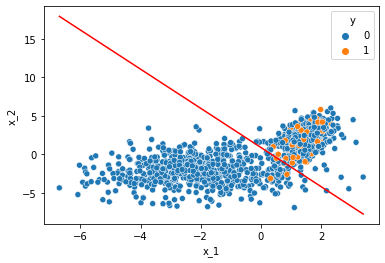

In [20]:
x1_vec = np.linspace(df["x_1"].min(),df["x_1"].max(),2)
sns.scatterplot(x="x_1", y="x_2", hue="y", data=df)
plt.plot(x1_vec,(-x1_vec*theta_final[1]-theta_final[0])/theta_final[2], color="red")

In [21]:
df = pd.read_csv("test.csv")

In [22]:
x = np.hstack([np.ones((df.shape[0], 1)), df[["x_1","x_2"]].values])

In [23]:
x.shape

(126, 3)

In [24]:
y = df[["t"]].to_numpy().astype(int)

In [25]:
y.shape

(126, 1)

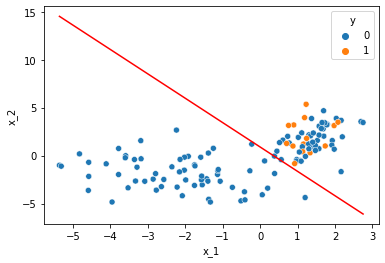

In [26]:
x1_vec = np.linspace(df["x_1"].min(),df["x_1"].max(),2)
sns.scatterplot(x="x_1", y="x_2", hue="y", data=df)
plt.plot(x1_vec,(-x1_vec*theta_final[1]-theta_final[0])/theta_final[2], color="red")

In [27]:
correct = 0
m = x.shape[0]
for i in range(m):
    prediction = sigmoid(x[i] @ theta_final)
    if prediction >= 0.5:
        prediction = 1
    else:
        prediction = 0
    if prediction == y.flatten()[i]:
        correct += 1
    else:
        print(f"prediction = {prediction} y = {y.flatten()[i]}")
print(correct)
print(f"Accuracy = {correct / m * 100}%")

prediction = 1 y = 0
prediction = 1 y = 0
prediction = 0 y = 1
123
Accuracy = 97.61904761904762%
